In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [3]:
dataset = pd.read_csv("synthetic_apk_dataset.csv")
dataset.head(3)

,apk_size,dex_size,vercode,scan_date,activities_count,services_count,certificate_expired,suspicious_api_calls,sha256,markets,anomaly,pkg_name,sha1,md5
0,10386469,4765888,121.0,15-06-2016 15:26,60,3,False,8,0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E2...,anzhi,0,com.zte.bamachaye,9C14D537A7ADB4CFC43D291352F73E05E0CCDD4A,3EDFC78AB53521942798AD551027D04F
1,3537486,3170096,16.0,20-11-2016 10:26,88,16,False,8,0000014A634DB98F85038B833A8DFC50D5FB13A464E0B2...,PlayDrone,0,com.tanersenel.onlinetvizle,C3EBEC52C9388BF67479FF1385A56C59B3E39E81,0A146750FB447CF3859C9CB659AB04F1
2,52469861,9201656,1206145.0,17-03-2021 08:02,59,3,False,3,000001A94F46A0C3DDA514E1F24E675648835BBA5EF3C3...,play.google.com,0,com.firstchoice.myfirstchoice,C0444D784685EFE5F6D9F28683B24B5873E509CB,EC82771AE018B93AD784A1FD2B625216


In [4]:
dataset.shape

(1048575, 14)

In [5]:
dataset.isnull

<bound method DataFrame.isnull of          apk_size  dex_size    vercode         scan_date  activities_count  \
0        10386469   4765888      121.0  15-06-2016 15:26                60   
1         3537486   3170096       16.0  20-11-2016 10:26                88   
2        52469861   9201656  1206145.0  17-03-2021 08:02                59   
3         4300370   4211104    10000.0  03-12-2017 06:50                79   
4        12958838   7813520   400125.0  25-06-2019 08:55                60   
...           ...       ...        ...               ...               ...   
1048570   5893778   8274352     2024.0  16-12-2019 03:40                84   
1048571  32851393   7465932   712000.0  26-09-2021 10:41                78   
1048572  35508162   5110276        1.0  13-01-2022 15:46                49   
1048573   3941032   8211512        8.0  19-06-2021 07:43                87   
1048574  39124696   6879416      139.0  03-05-2022 09:09                46   

         services_count  cert

In [6]:
dataset.isnull().sum()

apk_size                    0
dex_size                    0
vercode                   135
scan_date               12845
activities_count            0
services_count              0
certificate_expired         0
suspicious_api_calls        0
sha256                      0
markets                     0
anomaly                     0
pkg_name                    0
sha1                       16
md5                        16
dtype: int64

In [7]:
dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

0.0886373002816748

In [8]:
dataset.notnull().sum()

apk_size                1048575
dex_size                1048575
vercode                 1048440
scan_date               1035730
activities_count        1048575
services_count          1048575
certificate_expired     1048575
suspicious_api_calls    1048575
sha256                  1048575
markets                 1048575
anomaly                 1048575
pkg_name                1048575
sha1                    1048559
md5                     1048559
dtype: int64

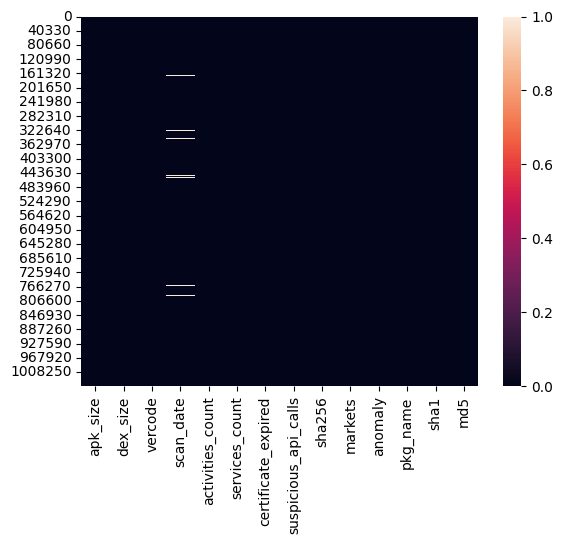

In [9]:
sns.heatmap(dataset.isnull())
plt.show()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   apk_size              1048575 non-null  int64  
 1   dex_size              1048575 non-null  int64  
 2   vercode               1048440 non-null  float64
 3   scan_date             1035730 non-null  object 
 4   activities_count      1048575 non-null  int64  
 5   services_count        1048575 non-null  int64  
 6   certificate_expired   1048575 non-null  bool   
 7   suspicious_api_calls  1048575 non-null  int64  
 8   sha256                1048575 non-null  object 
 9   markets               1048575 non-null  object 
 10  anomaly               1048575 non-null  int64  
 11  pkg_name              1048575 non-null  object 
 12  sha1                  1048559 non-null  object 
 13  md5                   1048559 non-null  object 
dtypes: bool(1), float64(1), int64(6), 

In [12]:
dataset["scan_date"].fillna(dataset["scan_date"].mode()[0],inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_1044\3277947646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["scan_date"].fillna(dataset["scan_date"].mode()[0],inplace = True)


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   apk_size              1048575 non-null  int64  
 1   dex_size              1048575 non-null  int64  
 2   vercode               1048440 non-null  float64
 3   scan_date             1048575 non-null  object 
 4   activities_count      1048575 non-null  int64  
 5   services_count        1048575 non-null  int64  
 6   certificate_expired   1048575 non-null  bool   
 7   suspicious_api_calls  1048575 non-null  int64  
 8   sha256                1048575 non-null  object 
 9   markets               1048575 non-null  object 
 10  anomaly               1048575 non-null  int64  
 11  pkg_name              1048575 non-null  object 
 12  sha1                  1048559 non-null  object 
 13  md5                   1048559 non-null  object 
dtypes: bool(1), float64(1), int64(6), 

In [14]:
dataset.isnull().sum()

apk_size                  0
dex_size                  0
vercode                 135
scan_date                 0
activities_count          0
services_count            0
certificate_expired       0
suspicious_api_calls      0
sha256                    0
markets                   0
anomaly                   0
pkg_name                  0
sha1                     16
md5                      16
dtype: int64

In [15]:
dataset["sha1"].fillna(dataset["sha1"].mode()[0],inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_1044\2047408719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["sha1"].fillna(dataset["sha1"].mode()[0],inplace = True)


In [16]:
dataset["md5"].fillna(dataset["md5"].mode()[0],inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_1044\3646746254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["md5"].fillna(dataset["md5"].mode()[0],inplace = True)


In [17]:
dataset.isnull().sum()

apk_size                  0
dex_size                  0
vercode                 135
scan_date                 0
activities_count          0
services_count            0
certificate_expired       0
suspicious_api_calls      0
sha256                    0
markets                   0
anomaly                   0
pkg_name                  0
sha1                      0
md5                       0
dtype: int64

In [18]:
dataset.info

<bound method DataFrame.info of          apk_size  dex_size    vercode         scan_date  activities_count  \
0        10386469   4765888      121.0  15-06-2016 15:26                60   
1         3537486   3170096       16.0  20-11-2016 10:26                88   
2        52469861   9201656  1206145.0  17-03-2021 08:02                59   
3         4300370   4211104    10000.0  03-12-2017 06:50                79   
4        12958838   7813520   400125.0  25-06-2019 08:55                60   
...           ...       ...        ...               ...               ...   
1048570   5893778   8274352     2024.0  16-12-2019 03:40                84   
1048571  32851393   7465932   712000.0  26-09-2021 10:41                78   
1048572  35508162   5110276        1.0  13-01-2022 15:46                49   
1048573   3941032   8211512        8.0  19-06-2021 07:43                87   
1048574  39124696   6879416      139.0  03-05-2022 09:09                46   

         services_count  certif

In [19]:
dataset.select_dtypes(include = "float64").columns

Index(['vercode'], dtype='object')

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
si = SimpleImputer(strategy = "mean")
si.fit_transform(dataset[["vercode"]])

array([[1.210000e+02],
       [1.600000e+01],
       [1.206145e+06],
       ...,
       [1.000000e+00],
       [8.000000e+00],
       [1.390000e+02]])

In [25]:
new_dataset=pd.DataFrame(columns=dataset.select_dtypes(include = "float64").columns)

In [26]:
new_dataset.isnull().sum()

vercode    0
dtype: int64

In [27]:
dataset.columns

Index(['apk_size', 'dex_size', 'vercode', 'scan_date', 'activities_count',
       'services_count', 'certificate_expired', 'suspicious_api_calls',
       'sha256', 'markets', 'anomaly', 'pkg_name', 'sha1', 'md5'],
      dtype='object')

In [28]:
dataset.isnull().sum()

apk_size                  0
dex_size                  0
vercode                 135
scan_date                 0
activities_count          0
services_count            0
certificate_expired       0
suspicious_api_calls      0
sha256                    0
markets                   0
anomaly                   0
pkg_name                  0
sha1                      0
md5                       0
dtype: int64